# **A Multivariate Analysis of Baseball Batting Statistics

---

and Salaries**
**ISQS 6350**

**Group 5: Daniel Brauckman, Jordan Gussett, Bryan Loeffler and Elijah Stahr**

# Introduction


In a non-salary capped sport, professional baseball teams are often competing on unlevel grounds. Each team is looking for their own, distinct, competitive advantages. For some, like the Yankees, Red Sox, and Dodgers, their advantage is financial - as in they can buy the best players. For other smaller market teams, like the Tampa Bay Rays and Arizona Diamondbacks, they must identify trends and performance indicators to surface value in players to make them competitive that they would not be able to afford otherwise. A Sports Illustrated article details one example of the Rays acquiring a pitcher based on his spin rate, a key indicator the organization looks for in development of pitching, and dropped his batting average against from .222 with the Pirates to .091 with the Rays. (Verducci). This is just a small window into the types of edges these organizations look for to compete on a yearly basis with those that can overpay for star players with obvious talent and production.

From general managers of professional sports franchises to general managers of a fantasy baseball team played amongst 10 to 12 friends, multivariate analysis can assist in identifying trends and patterns that can uncover value or competitive advantages. Anyone can spot a good player but through team building the strength of your supporting cast is what makes the most difference.

This project is based around doing multivariate analysis on baseball statistics. We used a publicly available dataset on Kaggle, involving baseball players names, various raw counting batting statistics, and salary information. Each observation (row) corresponds to a unique player in the MLB in the 2015 season, and each variable (column) corresponds to one of the various statistics recorded for each player. Our goal is to analyze the pay of athletes, and see if salary can be predicted or understood by various batting statistics. We also seek to understand if a player may be overvalued or undervalued based on their batting statistics relative to their salary. All of these statistical explorations have motivations in a better understanding of the game of baseball, and could even possibly be applied to more efficiently manage baseball teams. For example, if a rookie player is found to be clustered with many highly paid, established players, it may be benficial for a team to trade for the player while their salary is still relatively low.  

# Data Cleaning and Visualization

We start by allowing for R usage in Jupyter Notebook.

In [ ]:
%load_ext rpy2.ipython

We decided to use data from 2015, as it is the most current and impactful on modern salaries. We also removed data with 3 or less at bats. This is to remove any outliers due to low data. By the nature of our merge, we only retain players with recorded salaries. This is acceptable, because we plan on analyzing the salaries anyway. Additionally, the batting dataset required some cleaning before merging, as playerIDs (our planned column for join) were not unique due to mid-season trades. We account for this by summing statistics between the teams, as we care about the season statistics for the player without regard for their team. The final step in data cleaning is to replace the abbreviated column names with understandable column names, which will help analysis in the future.

**we should put the following code in an appendix for the final project, he says to not have long code sections in the report itself**

In [ ]:
%%R

# Load data sets
batting <- read.csv("https://raw.githubusercontent.com/estahr/mva-project/main/Batting.csv")
master <- read.csv("https://github.com/estahr/mva-project/raw/main/Master.csv")
salaries <- read.csv("https://raw.githubusercontent.com/estahr/mva-project/main/Salaries.csv")

# Keep only 2015 data, and remove columns that we are not analyzing

batting2015 = batting[which(batting$yearID == 2015),]
batting2015 = batting2015[,-c(2:5)]
master = master[,c(1,16)]
salaries2015 = salaries[which(salaries$yearID == 2015),]
salaries2015 = salaries2015[,-c(1:3)]

# We prepare for merge by checking if playerID is unique for all datasets

cat("Non unique playerID in salaries dataset:" )
print(length(salaries2015$playerID)-length(unique(salaries2015$playerID)))
print("Non unique playerID in master dataset:" )
print(nrow(master)-nrow(unique(master)))
print("Non unique playerID in batting dataset:" )
print(length(batting2015$playerID) - length(unique(batting2015$playerID)))

# We can see that we need to adjust the batting dataset to have unique playerID
# The reason the playerID is not unique is because mid-season trades duplicate the playerID
# We don't care what team the player played for, just their stats, so we will combine rows and add stats

batting2015 = aggregate(batting2015[,-1], batting2015["playerID"], sum)

print("Non unique playerID in batting dataset (after aggregation):" )
print(length(batting2015$playerID) - length(unique(batting2015$playerID)))

# Now all playerID values are unique and we can merge

data = merge(master, batting2015)
data = merge(data, salaries2015)

print("Merged Size" )
print(dim(data))

print("Size after removing missing data (there is none):")
data = na.omit(data)
print(dim(data))

print("Size after removing players with 3 or less at bats:")
data = data[-which(data$AB <= 3),]

#qualified hitters
#q_data = data[-which((data$AB / data$G) <= 3),]

print(dim(data))

library(data.table)

# Replace old column names with the actual words, might take this out if it makes outputs too messy
setnames(data, old = c(3:19),
  new = c("game", "at-bat", "run", "hit", "double", "triple", "home_run", "run_batted_in", "stolen_base", "caught_stealing", "walk", "strike_out", "intentional_walk", "hit_by_pitch", "sacrifice_hit", "sacrifice_fly", "ground_into_double_play"))

# Make the row names into the unique playerID rather than arbitrary index
rownames(data) = data[,c(1)]

Non unique playerID in salaries dataset:[1] 0
[1] "Non unique playerID in master dataset:"
[1] 0
[1] "Non unique playerID in batting dataset:"
[1] 138
[1] "Non unique playerID in batting dataset (after aggregation):"
[1] 0
[1] "Merged Size"
[1] 813  20
[1] "Size after removing missing data (there is none):"
[1] 813  20
[1] "Size after removing players with 3 or less at bats:"
[1] 531  20


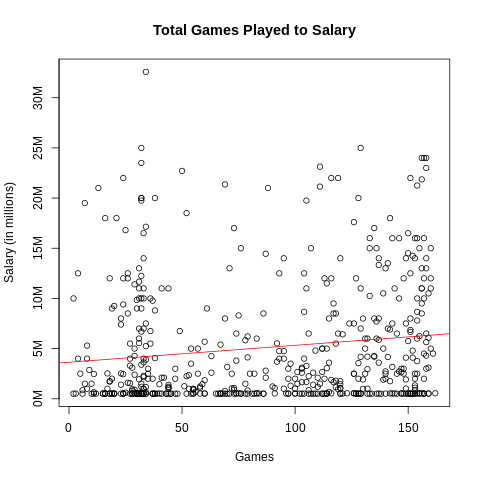

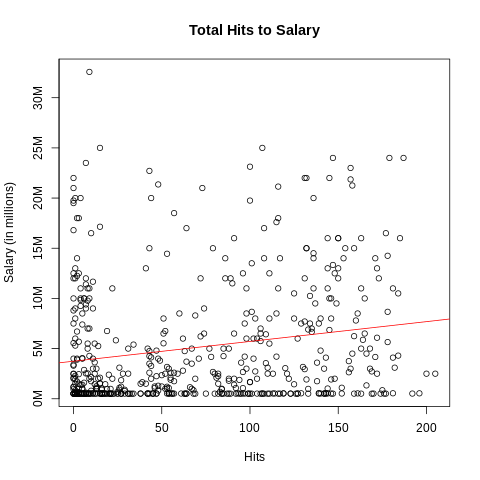

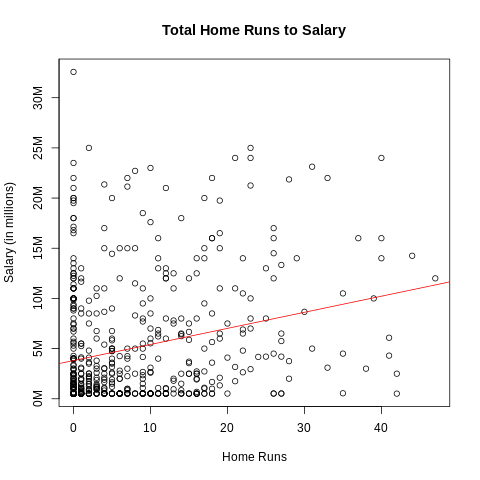

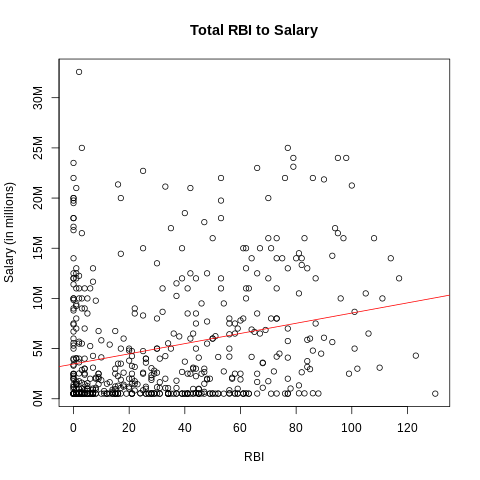

In [ ]:
%%R

#more visualizations

# Remove given names for now
numericalData = data[,-c(1,2)]


#Plot assumed valuable statistics in comparison to salary
plot(numericalData$game, numericalData$salary, xlab = "Games", ylab = "Salary (in millions)", main = "Total Games Played to Salary", yaxt = "n")
axis(side = 2, at = pretty(numericalData$salary), labels = paste0(pretty(numericalData$salary) / 1e6, "M"))
regression_model <- lm(salary ~ game, data = numericalData)
abline(regression_model, col = "red")

plot(numericalData$hit, numericalData$salary, xlab = "Hits", ylab = "Salary (in millions)", main = "Total Hits to Salary", yaxt = "n")
axis(side = 2, at = pretty(numericalData$salary), labels = paste0(pretty(numericalData$salary) / 1e6, "M"))
regression_model <- lm(salary ~ hit, data = numericalData)
abline(regression_model, col = "red")

plot(numericalData$home_run, numericalData$salary, xlab = "Home Runs", ylab = "Salary (in millions)", main = "Total Home Runs to Salary", yaxt = "n")
axis(side = 2, at = pretty(numericalData$salary), labels = paste0(pretty(numericalData$salary) / 1e6, "M"))
regression_model <- lm(salary ~ home_run, data = numericalData)
abline(regression_model, col = "red")

plot(numericalData$run_batted_in, numericalData$salary, xlab = "RBI", ylab = "Salary (in millions)", main = "Total RBI to Salary", yaxt = "n")
axis(side = 2, at = pretty(numericalData$salary), labels = paste0(pretty(numericalData$salary) / 1e6, "M"))
regression_model <- lm(salary ~ run_batted_in, data = numericalData)
abline(regression_model, col = "red")



# Dimensionality Reduction

In this section, we seek to reduce the dimensionality of our data in order to gain a better understanding of how our variables interact, and which variables introduce the most variability in our dataset.

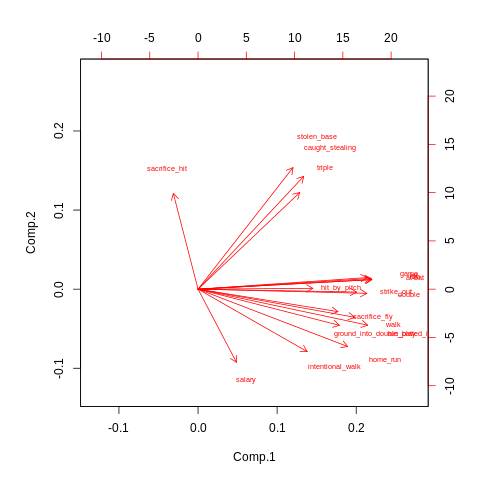

In [ ]:
%%R

# Remove given names for now
numericalData = data[,-c(1,2)]

#PCA

mydata.pca = princomp(numericalData, cor=TRUE)
summary(mydata.pca, loadings = TRUE)

#this looks awful with obersvations but at least gives a visualization of what something like salary is closely correlated to
#looks better without the observations added in
biplot(mydata.pca, col = c("black","red"), cex = 0.6, xlabs = rep("", nrow(numericalData)))

# We note that the first four loadings account for 81% of the variance, so we focus on those

With 18 variables available in the dataset, dimension reduction is important to gather an understanding of which variables can be grouped together to develop insights about the data. Types of hits, for example, like single, double, etc. can present noise regarding the overall number of hits since the two are inherently related. Reduction eliminates some redundancy identifying relevant variables.

The first four components in PCA account for approximately 81% of the variance in the dataset.

The first principal component covers the variance that exists in all hitting categories - it encompasses almost all types of players from power, to speed, to average hitters. The second component indicates a faster player. Triples and stolen bases are often attributed to speed archetypes, where power metrics often relate to players that aren't as fast. The loading values indicate high relative values to speed, such as triples, steals, and caught stealing (more attempts) and a contrasting value with power that's often not associated to a player that plays with speed. The third component seems to be a player with fewer at bats than an every day starter but enough to register relevant statistics, like a prevalent pinch hitter. Pinch hitters typically aren't utilized to bunt, hence the contrasting value of sacrifice hits. The fourth component appears to be pitchers that hit in the National League, albeit something no longer relevant (the DH became universal in 2022). Given pitchers don't hit but once every 5 days, they're often used to bunt (sacrifice hit) and this component has a high loadings value in that category to support. It's also rare a pitcher gets on base explaining the contrasting values for steals categories.

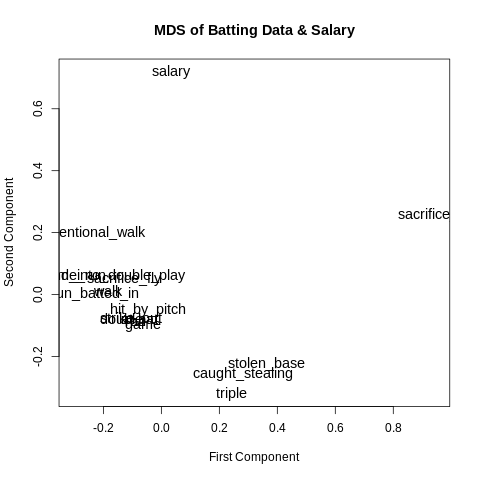

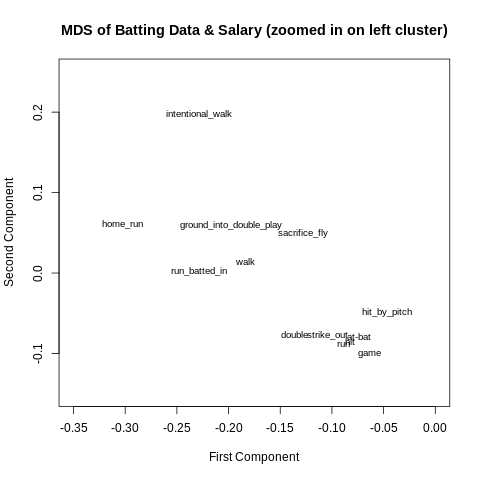

In [ ]:
%%R

baseball.d = as.dist(1-cor(numericalData))

hept.mds = cmdscale(baseball.d)

#Full plot

plot(hept.mds, type = "n",
     main = "MDS of Batting Data & Salary",
     xlab = "First Component", ylab = "Second Component")

text(hept.mds, labels = colnames(numericalData), cex = 1.2)

#Zoom in on left cluster

plot(hept.mds, type = "n",
     main = "MDS of Batting Data & Salary (zoomed in on left cluster)",
     xlab = "First Component", ylab = "Second Component",
     ylim = c(-0.15,0.25), xlim = c(-0.35, 0))

text(hept.mds, labels = colnames(numericalData), cex = 0.8)

We explore the associations between variables seen in multidimensional scaling further in cluster analysis.

# Cluster Analysis

In this section we create data clusters with the various algorithms we learned over the course of this class. The motivation behind clustering the data is to see if we are able to find and understand outliers within the clusters, or to see if clusters form at all. If clusters do form, they could give us insight into archetypes of batters, if such a thing exists.

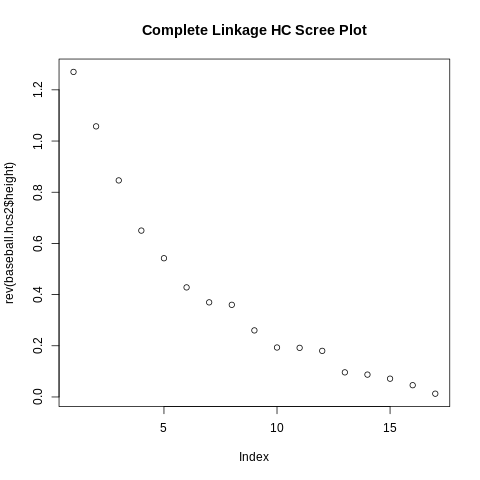

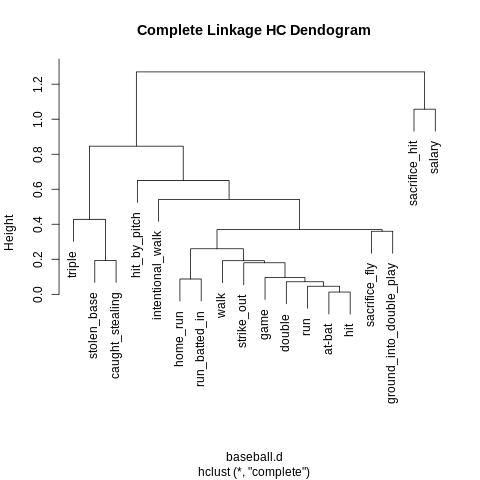

In [ ]:
%%R
baseball.hcs2 = hclust(baseball.d, "complete")

# We chose complete linkage clustering

plot(rev(baseball.hcs2$height), main = "Complete Linkage HC Scree Plot")
plot(baseball.hcs2, main = "Complete Linkage HC Dendogram")

In [ ]:
%%R

#keeping this separate for the time being

#scale data for kmeans
nd.s <- scale(numericalData)

set.seed(10)
#perform kmeans clustering
km <- kmeans(nd.s, centers = 4)
table(km$cluster)

#Observe variable z-score averages for each cluster
km_mean1 <- colMeans(subset(nd.s, km$cluster == 1))
km_mean2 <- colMeans(subset(nd.s, km$cluster == 2))
km_mean3 <- colMeans(subset(nd.s, km$cluster == 3))
km_mean4 <- colMeans(subset(nd.s, km$cluster == 4))





In an effort to classify characteristics of each cluster, we utilized averaging each scaled variable per cluster to interpret relationships that could assist in determining what type of player fit into each cluster.

Cluster 1 - Bench Warmers:
229 players. The value that stands out is that this group is 1.02 standard deviations below the mean for games played. Subsequently, all other categories fall below the mean as each variable is a cumulative measure. Every single variable’s average is below the mean besides sacrifice hits. This grouping seems to be filled with bench players that received spot starts, pinch hit at-bats, or players that were qualified due to the number of at-bats but got injured at some point.

Cluster 2 - Replacement Level Players:
146 players. Almost every variable has a z-score very close to 0. This cluster could be classified as the average, every day player. No one in the group is exceptional with regards to any statistic. They gather enough playing time to accumulate an average number of statistics but aren’t in anyway valuable above another replacement level player.

Cluster 3 - Table Setters:
67 players. This group has z-scores above 1 standard deviation for several valuable categories, among them stolen bases (1.96), triples (1.52), runs (1.16), and hits (1.22). This group could be categorized as speed or contact players - players that don’t typically hit for a lot of power but are considered “table setters,” or players that get on base for other run producing players to drive in. Notably, this group is below average for salary (-0.16), depending on how an organization is building a team (small ball, run manufacturing) this is a category where metrics can be used to identify value.

Cluster 4 - Run Producers:
89 players. With average z-scores of 1.62 in homers, 1.60 in RBI, 1.35 in doubles, and 1.36 in IBB, this cluster seems to clearly be the run producing or power driven players. Given the close to average values in stolen bases and triples this cluster doesn’t employ a lot of speed. Other values to note, 1.23 strike outs and 1.31 sacrifice fly also indicate an all or nothing group of hitters.  The salary z-score is 0.85, meaning the league will typically pay above average price for this archetype of hitter.


# Confirmatory Factor Analysis

In this section, we first do an exploratory factor analysis (EFA). This helps assist us in understanding the relations between variables. We then create a model with latent variables, in an attempt to verify the integrity of the model generated by our EFA model. We chose to remove columns in order to optimize our p-value and RMSR values, as to ensure a well-fitted model. This is mostly due to the fact that several of the original columns in the dataset are too highly correlated to be included in an effective EFA.

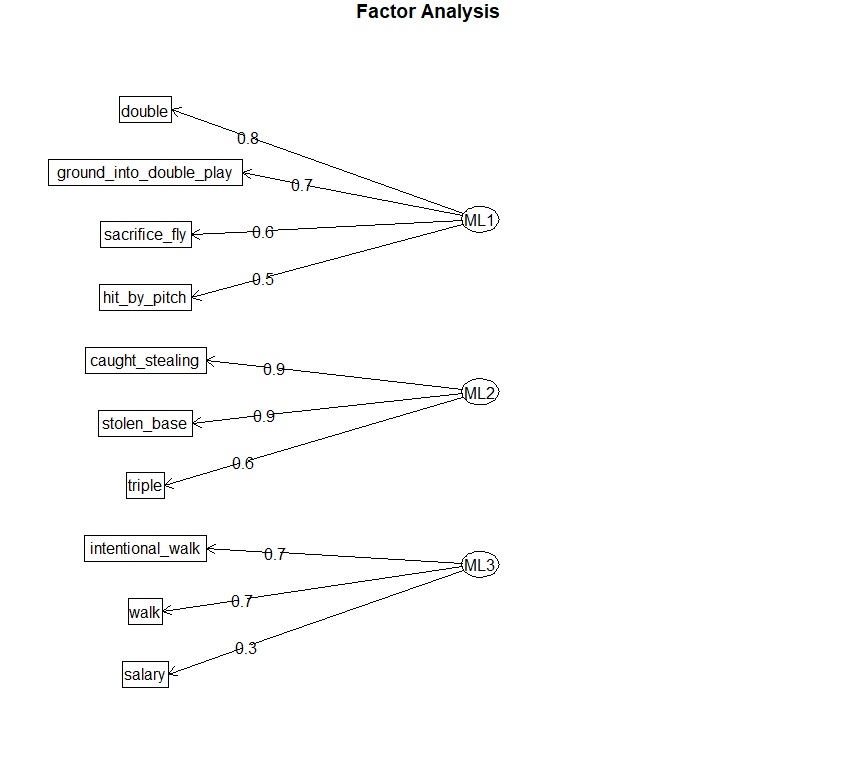

The above model describes our three factors that are comprised of our manifest variables. We use these groupings to form our three latent variables. We chose to characterize the first factor as slow/utility players, the second as fast players, and the final factor as big hitters.



In [ ]:
%%R

# Use if needed
#install.packages(c("EFAtools", "psych", "sem"))

library(sem)
library(psych)
library(EFAtools)

# We remove columns here that were too highly correlated. These were tested by running EFA repeatedly until goodness of fit statistics reached an acceptable level.
efaData = numericalData[,-c(2:4,8,12,15)]

# Run tests to see if data is suitable for EFA
BARTLETT(efaData)
KMO(efaData)

nd.fa = fa(efaData, fm = "ml", rotate = "varimax", nfactors = 3)

print(nd.fa, cut = 0.3)

# We can see that RMSR as well as various other goodness of fit indices indicate that this model is probably a good fit for our data.

# This diagram shows our model

fa.diagram(nd.fa)

# Some of these explanatory factors make sense with our knowledge of baseball i.e. factor 3 indicates the influence of salary <-> home_run <-> intentional_walk
# We now continue to CFA.

baseball_model <- specifyModel(text = "
Slow -> double , lambda1, NA
Slow -> ground_into_double_play , lambda2, NA
Slow -> sacrifice_fly , lambda3, NA
Slow -> hit_by_pitch , lambda4, NA
Fast -> caught_stealing, lambda5, NA
Fast -> stolen_base , lambda6, NA
Fast -> triple , lambda7, NA
Big -> intentional_walk , lambda8, NA
Big -> walk , lambda9, NA
Big -> salary , lambda10, NA
double <-> double , psi1 , NA
ground_into_double_play <-> ground_into_double_play , psi2 , NA
sacrifice_fly <-> sacrifice_fly , psi3 , NA
hit_by_pitch <-> hit_by_pitch , psi4 , NA
caught_stealing <-> caught_stealing, psi5 , NA
stolen_base <-> stolen_base , psi6 , NA
triple <-> triple , psi7 , NA
intentional_walk <-> intentional_walk , psi8 , NA
walk <-> walk , psi9 , NA
salary <-> salary , psi10 , NA
Slow <-> Slow, NA , 1
Fast <-> Fast, NA , 1
Big <-> Big, NA , 1
Slow <-> Fast, phi12 , NA
Fast <-> Big, phi13 , NA
Big <-> Slow, phi14 , NA")

options(fit.indices = c("GFI", "AGFI", "SRMR"))

baseball.sem = sem(baseball_model, cor(efaData), nrow(efaData))

baseball.sem.smy = summary(baseball.sem)

round(baseball.sem.smy$GFI, 2)
round(baseball.sem.smy$AGFI, 2)
round(baseball.sem.smy$SRMR, 2)

baseball.sem.smy$coeff


library(semPlot)
semPaths(baseball.sem, rotation = 2, 'est', edge.label.cex = 1.2)


Error in library(sem) : there is no package called ‘sem’


Our original exploratory factor analysis gave us interpretable factors that alligned with our previous understanding of the dataset. Knowing this, we chose to use the model to continue into CFA.

After enacting the CFA, the model is shown to have acceptable goodness of fit indices (GFI = 0.94, AGFI = 0.89 and RMSR = 0.06). Note that the estimated variance of the disturbance for the variable "walk" is very low, and we fail to show significance with a p-value of 0.4 for this parameter. However, every other disturbance term passes a 0.05 significance test. (see appendix)

Considering the latent variables, we can reach some interesting conclusions. Salary being included in the latent variable with home runs and intentional walks makes sense, as star players are more likely to hit home runs, and are more likely to be intentionally walked out of fear of a strong performance at the plate. Hit by pitch is also included in this group. Two possible hypotheses are that pitchers may intentionally hit better batters, similar to an intentional walk. It is also possible that the star/stronger batters may be more likely to "crowd" the plate, getting nearer to the strike zone for better positioning on outside pitches, and increasing the chances of a walk by being hit by a pitch. Finally, walk is also included in this group, but with a low p-value and similar loadings across all three factors in EFA, it is likely not worth considering to heavily.

The latent variable we describe as "fast", encompasses manifest variables caught stealing, stolen base, and triple. Stolen base and triple make sense to be associated, as they both require speed and base running knowledge. Caught stealing might seem counterintuitive for a fast player, but it is important to note that in baseball, slower players are unlikely to even attempt to steal a base. Thus, faster players having more steal attempts means they inevitably will have more times caught stealing. This connection is interesting to see here, as it is the same grouping as found in our complete linkage hierarchical clustering earlier.

The final latent variable is harder to directly characterize. In the model I describe it as "slow", but the variable may better be described as utility, or simply weaker batters. There are three manifest variables comprising this latent variable (double, ground into double play, and sacrifice fly). Ground into double play is a negative hitting statistics, where the batters weak hit causes two outs for their team. A sacrifice fly is where a batter will, either intentionally or unintentionally, hit a pop fly and get out while allowing an on-base runner to score. This statistic is generally positive, although many stronger athletes may not be asked by a coach to hit a sacrifice fly, as the may have confidence in them to get on base and score the RBI without getting out. These three statistics may indicate that the batter is not as strong,

# Conclusion

In any statistical analysis, there will be some difficulties encountered. This project was no different. One example of this in our project is how the number of at-bats/games played is by far the biggest influence on the amount of every other statistic. This leads to difficulties in the analysis. For example, take the variable ground into double play (GIDP). You would expect this statistic to be a powerful way to identify weaker hitters, or at least have a negative correlation with something like home runs. Instead, we see a positive correlation between GIDP and home runs, hits, and at-bats. As a real world example, Albert Pujols, one of the greatest hitters of all time, also has by far the greatest number of GIDPs. The positive correlations between one statistic considered positive and one statistic considered negative make it difficult to analyze batters effectively (at least with our methodology).

Despite the difficulties, we were able to gain some of the desired knowledge from our data.  